In [1]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
import glob
import os

In [2]:
# We search for all <filename> files present in the folders within folder_in. folder_out will be the physical output
folder_prefix = '../../ICS_topologies/enhanced_ctown_topology/2021_data/'
folder_in = folder_prefix + '30_week_simulation/'
folder_out = folder_prefix + 'processed_beats/'
filename = 'physical_process.csv'
file_expr = folder_in + '*'
paths = glob.glob(file_expr)
directories = []
for path in paths:
    directories.append(path.split('\\')[1])        

var_cat_noncat =['J306_LEVEL', 'J317_LEVEL']
tanks = ['T1_LEVEL', 'T2_LEVEL', 'T3_LEVEL', 'T4_LEVEL', 'T5_LEVEL', 'T6_LEVEL', 'T7_LEVEL']
joints = ['J280_LEVEL', 'J269_LEVEL', 'J300_LEVEL', 'J256_LEVEL', 'J289_LEVEL', 'J415_LEVEL',
          'J302_LEVEL', 'J306_LEVEL', 'J307_LEVEL', 'J317_LEVEL', 'J14_LEVEL', 'J422_LEVEL']

trouble_joints = ['J306_LEVEL', 'J307_LEVEL']


In [3]:
# Create folder out if it doesn't exist
if not os.path.exists(folder_out):
    os.mkdir(folder_out)

# Clean junctions with problems
for week in directories:
    # Read original physical process variable
    week_data = pd.read_csv(folder_in + '/' + week +'/' + filename)
    
    # Apply conditional to clean
    week_data = week_data[week_data['J306_LEVEL'] < 90]
    week_data = week_data[week_data['J317_LEVEL'] < 90]
    
    # Create folder if it does not exists
    if not os.path.exists(folder_out + '' + week +'/'):
        os.mkdir(folder_out + '' + week +'/')    
    
    # Save cleaned value
    week_data.to_csv(folder_out + '' + week +'/' + filename)

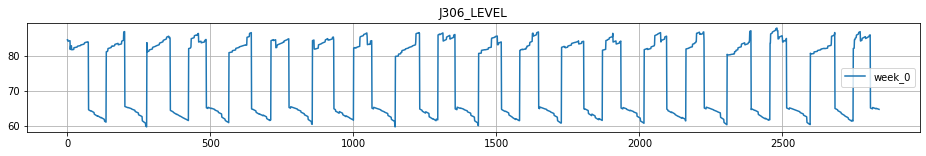

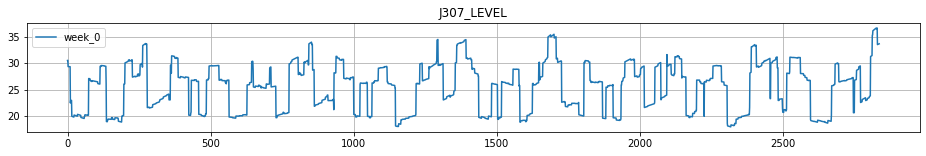

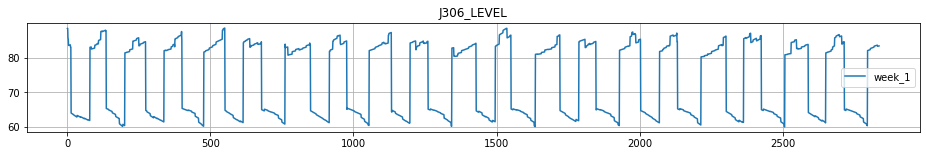

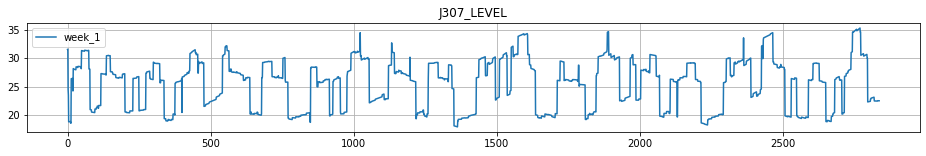

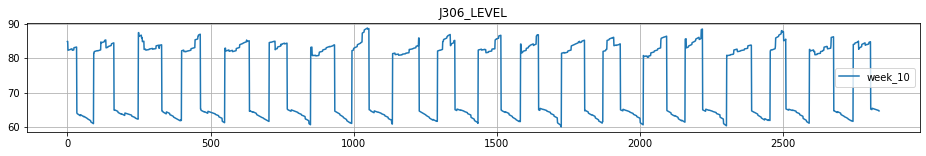

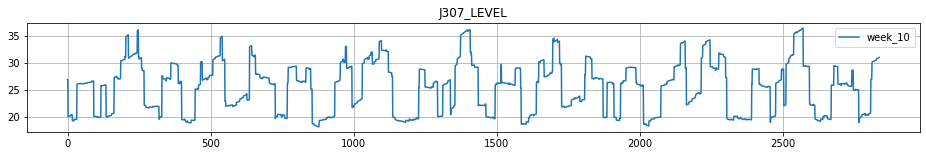

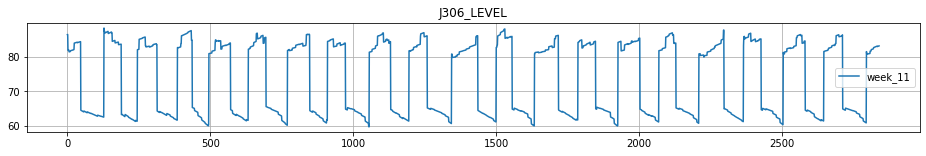

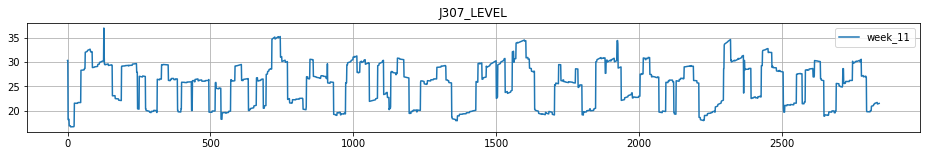

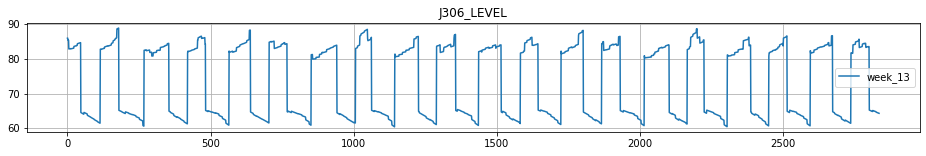

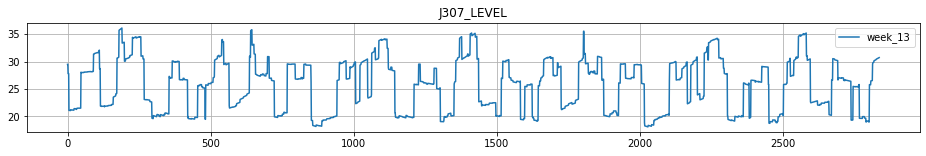

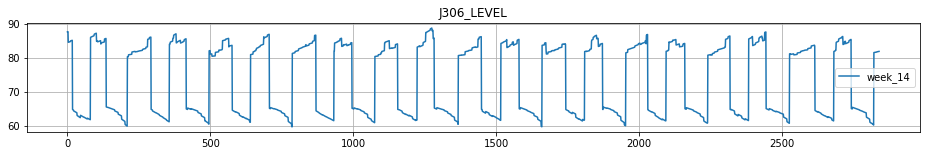

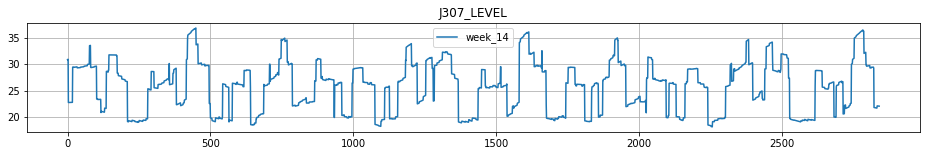

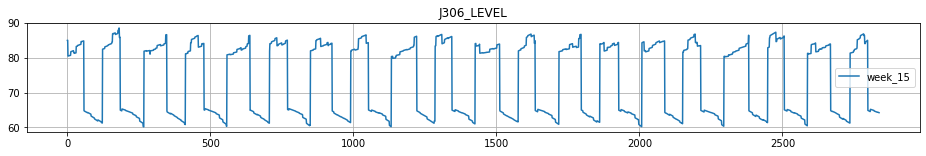

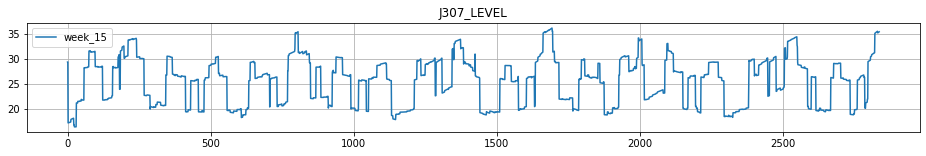

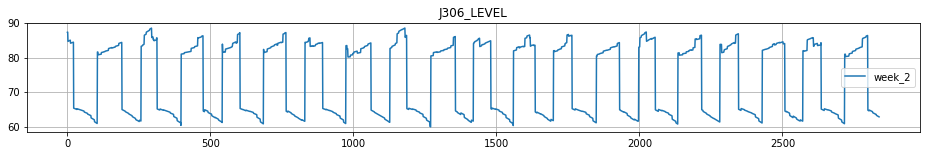

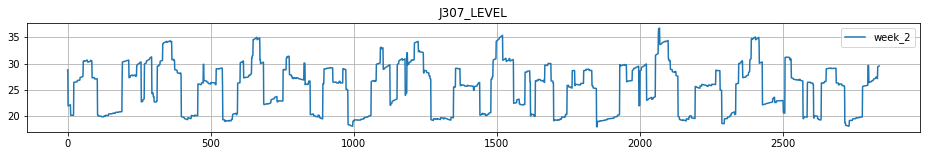

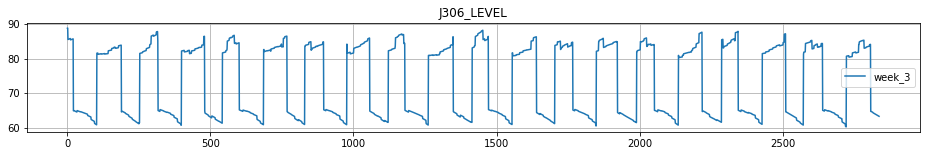

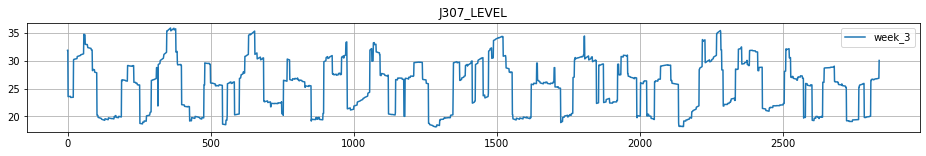

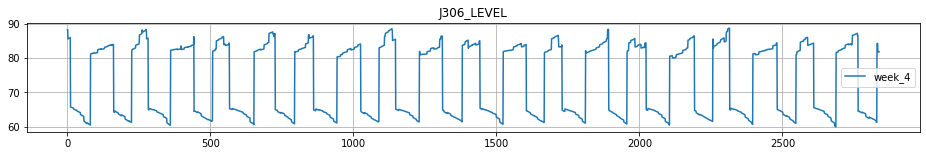

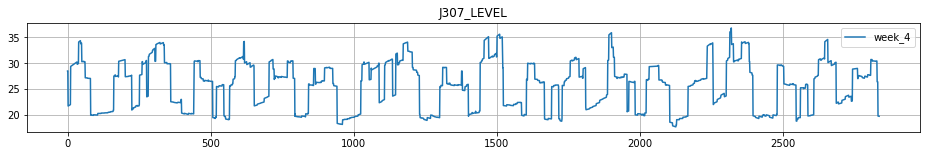

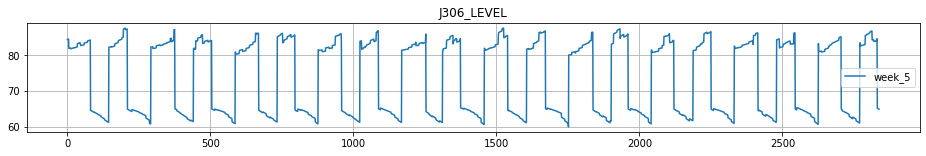

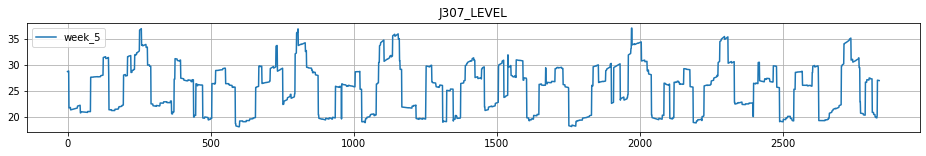

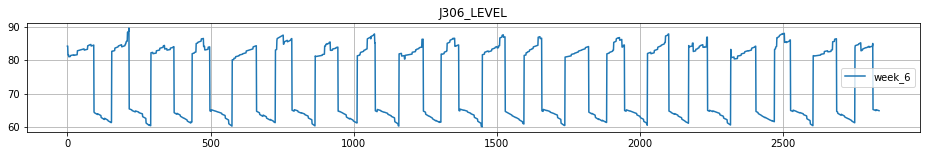

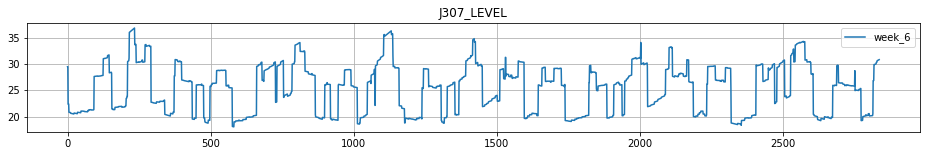

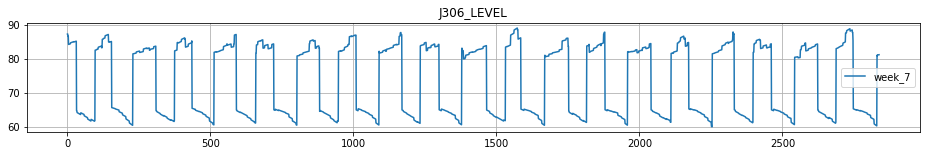

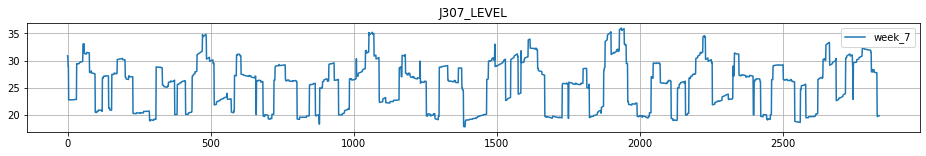

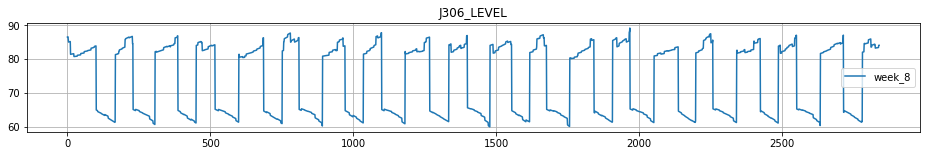

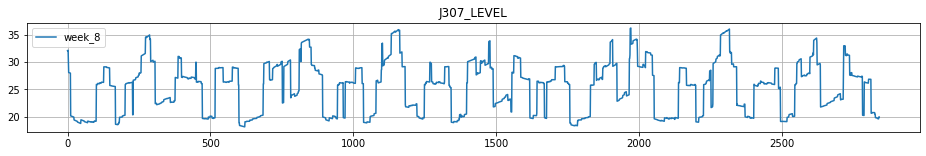

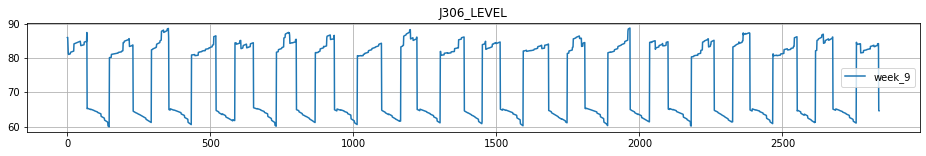

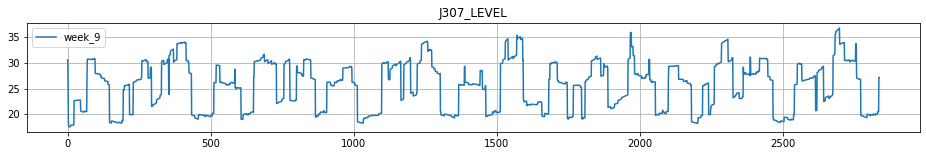

In [4]:
# Plot the clear files
def plot_var(tags, data, a_label):
    for var in (tags):
        plt.figure(figsize=(16, 2))    
        plt.plot(data[var], label=a_label)          
        plt.legend()
        plt.grid(True)
        plt.title(var)
        plt.show()  

trouble_joints = ['J306_LEVEL', 'J307_LEVEL']
for week in directories:
    week_data = pd.read_csv(folder_out + '/' + week +'/' + filename)   
    var_all = list(week_data.head(0))
        
    # Junctions J306 and J317 with 1 minute hydraulic timestep    
    plot_var(trouble_joints, week_data, week)   